# 2019 Happiness Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## Purpose of this notebook

- Preliminary analysis of 2019 data only since it is the most recent complete/comprehensive happiness data available with the World Happiness Report
- identify some potential directions for other analysis notebooks and data story

#### Load data into a data frame called hap19_df

In [2]:
hap19_df = pd.read_csv('../data/raw_data/06_to_19.csv')

In [3]:
hap19_df

,iso_alpha,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,AFG,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,ZWE,Zimbabwe,2015,3.703191,7.827643,0.735800,53.799999,0.667193,-0.117035,0.810457,...,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1817,ZWE,Zimbabwe,2016,3.735400,7.819675,0.768425,54.400002,0.732971,-0.088488,0.723612,...,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1818,ZWE,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,...,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1819,ZWE,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,...,NaN,0.432,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [18]:
hap19_df.columns

Index(['iso_alpha', 'country', 'year', 'happiness_rating', 'GDP_per_capita',
       'social_support_rating', 'life_expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'positive_affect', 'negative_affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup', 'trust_81_to_84',
       'trust_89_to_93', 'trust_94_to_98', 'trust_99_to_04', 'trust_05_to_09',
       'trust_10_to_14'],
      dtype='object')

In [4]:
hap19_df.shape

(1821, 27)

### Observations
- The data recorded in the columns:
    - `country`- the country/location name
    - `year`- the year the data represents
    - `life ladder`- measure of happiness based on life satisfaction from a scale of 0 to 10 (also known as the Cantril Scale in the Gallup World Poll)
    - `GDP per capita`: self-explanatory
    - `social support rating`
    - `life expectancy scores at birth`
    - `confidence in national government`, `democratic quality`: measures of trust and faith in the government
    - `delivery quality`: unsure what this refers to
    - `freedom to make life choices`: an indicator of individualism
    - charitable `generosity`: self-reported evaluation of generosity?? check what this precisely refers to
    - `positive affect` and `negative affect`: the survey coded specific questions as falling under these two
    - `Most people can be trusted`: levels of trust in others, seems to be from a longitudinal dataset that goes even further back. 
- Total of 27 columns and 1821 entries. 
- Missing data for trust, but not particularly interested in these columns.

### Rename columns

In [5]:
name_dict = {
    'Country name': 'country',
    'Life Ladder': 'happiness_rating',
    'Log GDP per capita': 'GDP_per_capita',
    'Social support':'social_support_rating',
    'Healthy life expectancy at birth':'life_expectancy',
    'Positive affect':'positive_affect',
    'Negative affect':'negative_affect',
    'Most people can be trusted, WVS round 1981-1984': 'trust_81_to_84',
    'Most people can be trusted, WVS round 1989-1993': 'trust_89_to_93',
    'Most people can be trusted, WVS round 1994-1998': 'trust_94_to_98',
    'Most people can be trusted, WVS round 1999-2004': 'trust_99_to_04',
    'Most people can be trusted, WVS round 2005-2009': 'trust_05_to_09',
    'Most people can be trusted, WVS round 2010-2014': 'trust_10_to_14',}
hap19_df = hap19_df.rename(columns = name_dict)

### Filtering dataset and initial plots

In [6]:
row_filter_2019= hap19_df['year'] ==2019
rf2019_df = hap19_df[row_filter_2019]

In [7]:
# get range
rf2019_df['happiness_rating'].describe()

count    138.000000
mean       5.551438
std        1.112188
min        2.375092
25%        4.918828
50%        5.594325
75%        6.266353
max        7.780348
Name: happiness_rating, dtype: float64

<AxesSubplot:xlabel='country'>

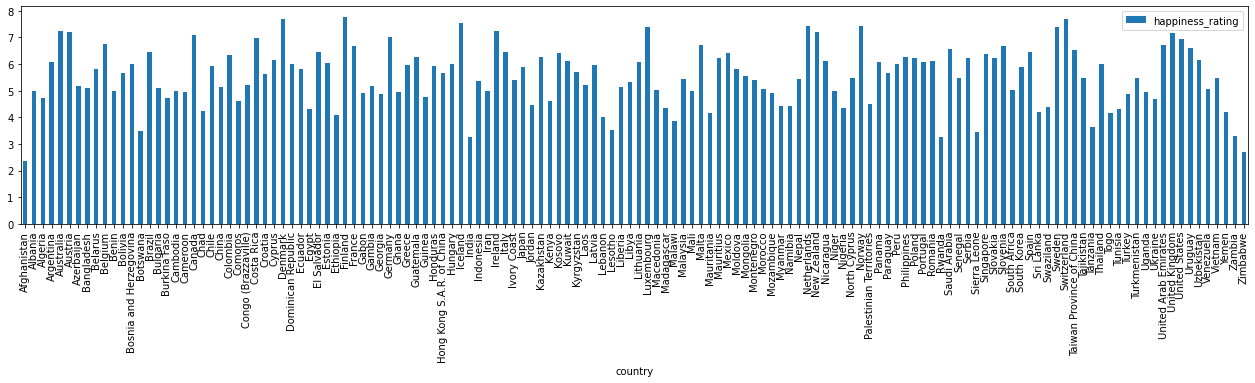

In [8]:
rf2019_df.plot.bar(x='country', y='happiness_rating', figsize=(22,4))

### Observations
Happiness ratings:
- High: Denmark, Finland, Canada, Ireland, Netherlands, Norway, Sweden
- Low: Togo, Sierra Leone, Zimbabwe, Afghanistan, Benin, Congo, Haiti, Kenya

<AxesSubplot:xlabel='country'>

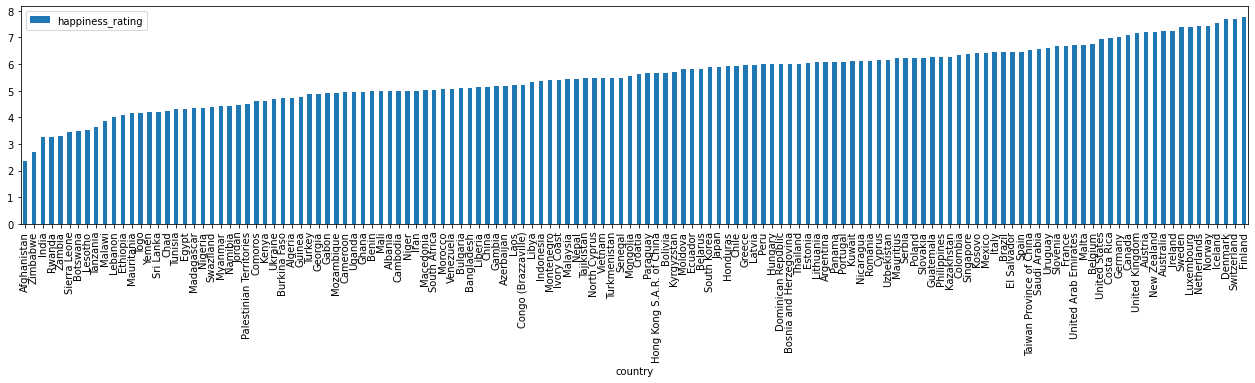

In [9]:
rf2019_df.sort_values('happiness_rating').plot.bar(x='country', y='happiness_rating', figsize=(22,4))

<AxesSubplot:xlabel='country'>

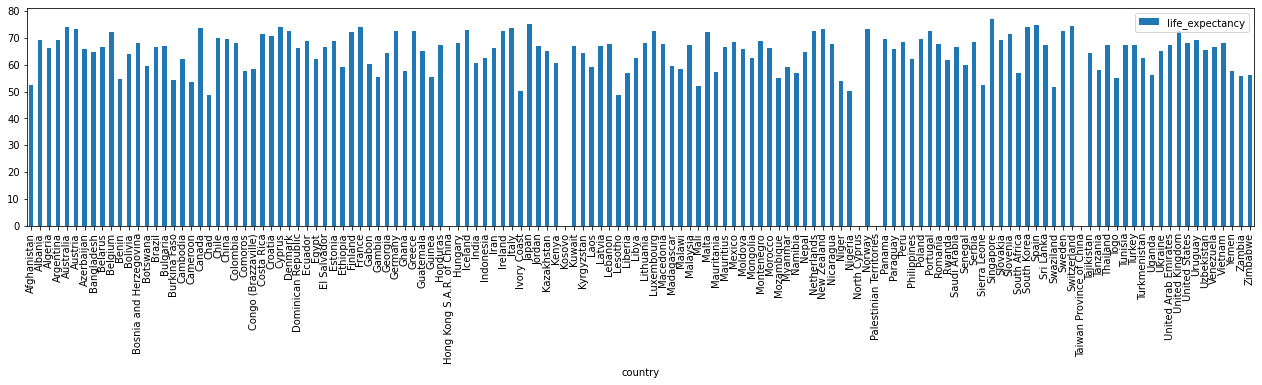

In [10]:
rf2019_df.plot.bar(x='country', y='life_expectancy', figsize=(22,4))

### Observations
Life Expectancies:
- High: Hong Kong, Japan, Singapore
- Low: Sierra Leone, Botswania

<AxesSubplot:xlabel='country'>

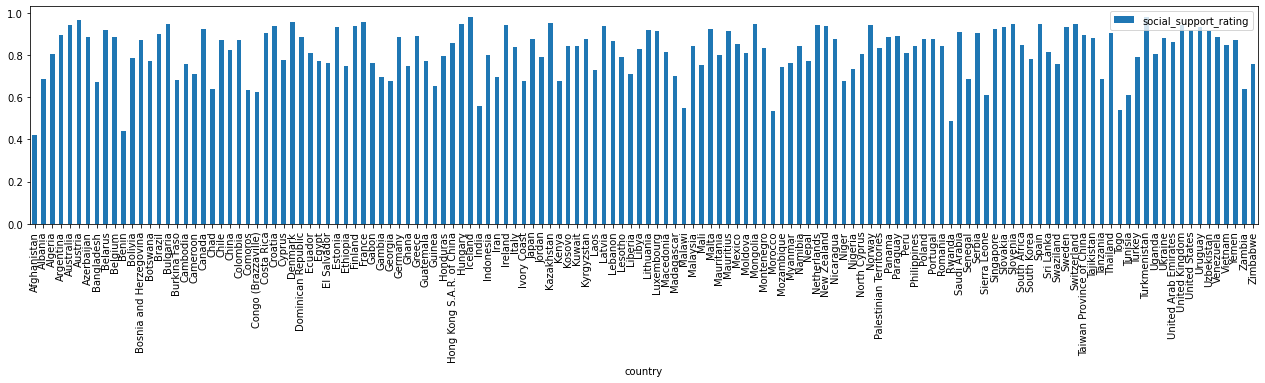

In [11]:
rf2019_df.plot.bar(x='country', y='social_support_rating', figsize=(22,4))

### Observations
Social support ratings:
- High: Ireland, Iceland, Spain, Canada, Lithuania, Sweden, UK, US
- Low: Togo, Burundi, Pakistan, Benin

<AxesSubplot:xlabel='social_support_rating', ylabel='happiness_rating'>

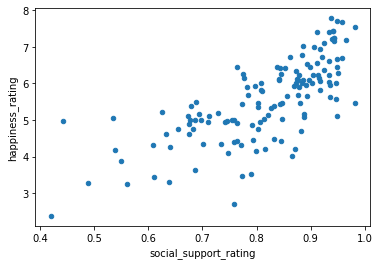

In [12]:
rf2019_df.plot.scatter(x='social_support_rating', y='happiness_rating')

<AxesSubplot:xlabel='life_expectancy', ylabel='happiness_rating'>

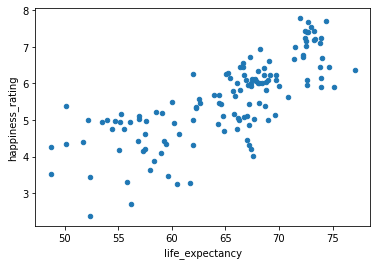

In [13]:
rf2019_df.plot.scatter(x='life_expectancy', y='happiness_rating')

<AxesSubplot:xlabel='GDP_per_capita', ylabel='happiness_rating'>

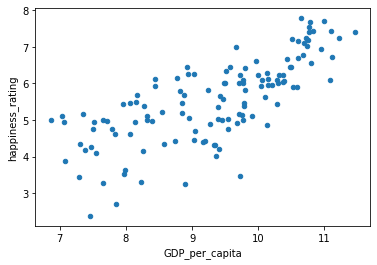

In [14]:
rf2019_df.plot.scatter(x='GDP_per_capita', y='happiness_rating')

<AxesSubplot:xlabel='positive_affect', ylabel='happiness_rating'>

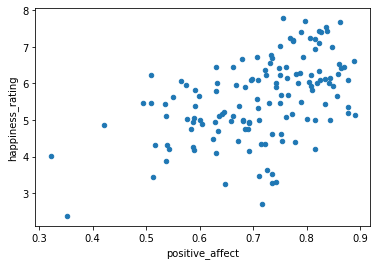

In [15]:
rf2019_df.plot.scatter(x='positive_affect', y='happiness_rating')

### Observations
There are strong correlations between some of the variables. The dataset certainly has a lot of things I can work with. This was just with the year 2019. I'm interested to see if these patterns will be seen with following years. Some countries were missing in the dataset so I am also interested in seeing if that data does exist somewhere and can be incorporated. Definitely seeing some patterns by geography and correlations between variables, some I'm not surprised by, but very interesting!

*Note: I will definitely have to present the bar graphs in a much more eye-friendly manner. Next steps would be to group by larger regions and mapping it.

In [16]:
# Some correlations
cols_to_compare=['positive_affect', 'GDP_per_capita', 'life_expectancy', 'happiness_rating']

rf2019_df[cols_to_compare].corr()

,positive_affect,GDP_per_capita,life_expectancy,happiness_rating
positive_affect,1.000000,0.259961,0.266632,0.485172
GDP_per_capita,0.259961,1.000000,0.829389,0.733776
life_expectancy,0.266632,0.829389,1.000000,0.756200
happiness_rating,0.485172,0.733776,0.756200,1.000000


### Next Steps
- look deeper into variables correlating with happiness
- regional perspective (categorize countries into regions and see if any patterns)
- look at all the years 2006-2018 to see any trends longitudinally
- then go from there...